# ** --- AML Assignment ---**

*   BITS ID : 2024DA04180
*   Name - Kamthekar Prasanna Yeshwantrao
*   Course: Applied Machine Learning
*   Topic: The Streamify Churn Prediction Challenge

## Task 2: Data Exploration and Visualization

*   Load the data set obtained from Task 1. CSV is placed in same folde.
*   Perform initial Data Exploration (EDA)
*   Visualize the data to find insights  

In [2]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
try:
    df = pd.read_csv('streamify_churn.csv')
    print("Dataset 'streamify_churn.csv' loaded successfully! 🎉")
except FileNotFoundError:
    print("Error: 'streamify_churn.csv' not found. Please ensure the file is in the correct directory.")
    exit()

Dataset 'streamify_churn.csv' loaded successfully! 🎉


In [3]:
# Initial Analysis: Understanding the data's structure

print("\n--- Initial Data Information (.info()) ---")
df.info()


--- Initial Data Information (.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 1000 non-null   int64  
 1   age                     1000 non-null   int64  
 2   subscription_plan       1000 non-null   object 
 3   monthly_watch_hours     1000 non-null   float64
 4   devices_used            1000 non-null   int64  
 5   customer_support_calls  1000 non-null   int64  
 6   used_promo              1000 non-null   bool   
 7   last_active_days_ago    1000 non-null   int64  
 8   will_churn              1000 non-null   bool   
dtypes: bool(2), float64(1), int64(5), object(1)
memory usage: 56.8+ KB


In [4]:
# .describe() generates descriptive statistics for numerical columns.
print("\n--- Descriptive Statistics (.describe()) ---")
print(df.describe())


--- Descriptive Statistics (.describe()) ---
           user_id         age  monthly_watch_hours  devices_used  \
count  1000.000000  1000.00000          1000.000000   1000.000000   
mean   1500.500000    43.81900           127.377520      2.991000   
std     288.819436    14.99103            70.769235      1.427921   
min    1001.000000    18.00000             5.030000      1.000000   
25%    1250.750000    31.00000            68.537500      2.000000   
50%    1500.500000    44.00000           128.520000      3.000000   
75%    1750.250000    56.00000           189.215000      4.000000   
max    2000.000000    69.00000           249.600000      5.000000   

       customer_support_calls  last_active_days_ago  
count             1000.000000           1000.000000  
mean                 4.595000             45.169000  
std                  2.820449             25.740221  
min                  0.000000              0.000000  
25%                  2.000000             23.750000  
50%     

In [5]:
# .isnull().sum() checks for missing values in each column.
print("\n--- Missing Values Check (.isnull().sum()) ---")
print(df.isnull().sum())
#  there are no missing values in this dataset,


--- Missing Values Check (.isnull().sum()) ---
user_id                   0
age                       0
subscription_plan         0
monthly_watch_hours       0
devices_used              0
customer_support_calls    0
used_promo                0
last_active_days_ago      0
will_churn                0
dtype: int64


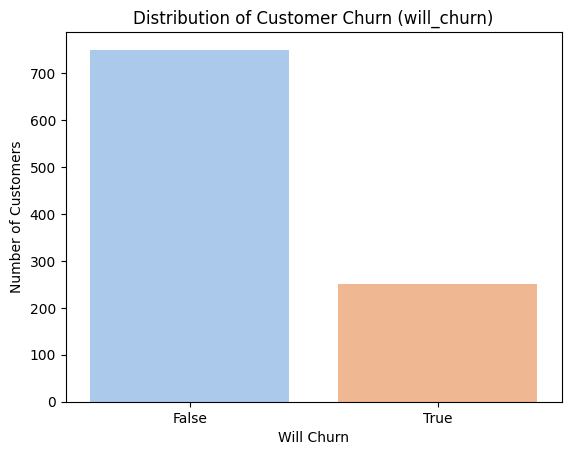


Churn Distribution:
will_churn
False    750
True     250
Name: count, dtype: int64
Observation - The dataset appears to be somewhat imbalanced


In [6]:
# Visualizing the data to find insights


# 1. Bar chart for the target variable (will_churn)
# This helps us understand the distribution of our target variable:
# how many customers churned (True) versus how many stayed (False).
sns.countplot(x='will_churn', data=df, palette='pastel', hue='will_churn', legend=False)
plt.title('Distribution of Customer Churn (will_churn)')
plt.xlabel('Will Churn')
plt.ylabel('Number of Customers')
plt.show()
# Check for dataset balance:
churn_counts = df['will_churn'].value_counts()
print(f"\nChurn Distribution:\n{churn_counts}")
if churn_counts[True] / churn_counts.sum() < 0.3 or churn_counts[False] / churn_counts.sum() < 0.3:
    print("Observation - The dataset appears to be somewhat imbalanced")
else:
    print("The dataset appears to be relatively balanced.")

Text(0, 0.5, 'Frequency')

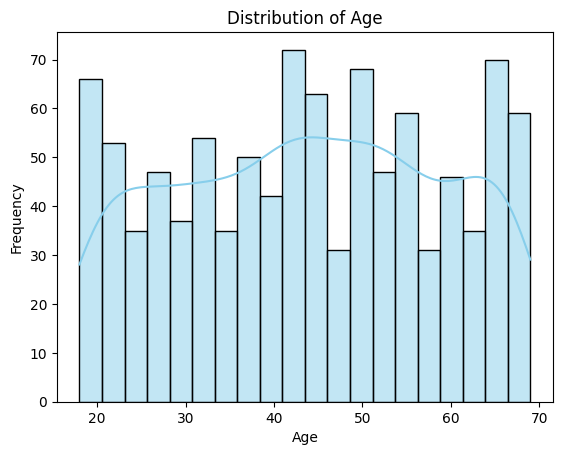

In [7]:
# 2. Histograms for numerical features
# Histograms show the distribution of numerical data.
# 'age' distribution
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')



Text(0, 0.5, 'Frequency')

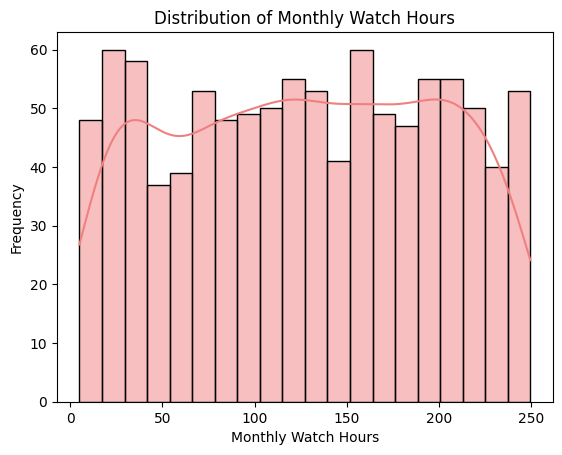

In [8]:
# 'monthly_watch_hours' distribution
sns.histplot(df['monthly_watch_hours'], kde=True, bins=20, color='lightcoral')
plt.title('Distribution of Monthly Watch Hours')
plt.xlabel('Monthly Watch Hours')
plt.ylabel('Frequency')



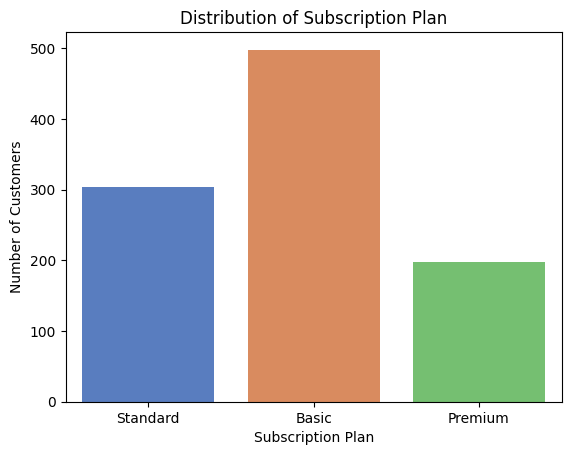

In [9]:
# 3. Bar charts for categorical features
# These show the frequency of each category within the feature.

# 'subscription_plan' distribution
sns.countplot(x='subscription_plan', data=df, palette='muted', hue='subscription_plan', legend=False)
plt.title('Distribution of Subscription Plan')
plt.xlabel('Subscription Plan')
plt.ylabel('Number of Customers')
plt.show()


--- Correlation Heatmap ---


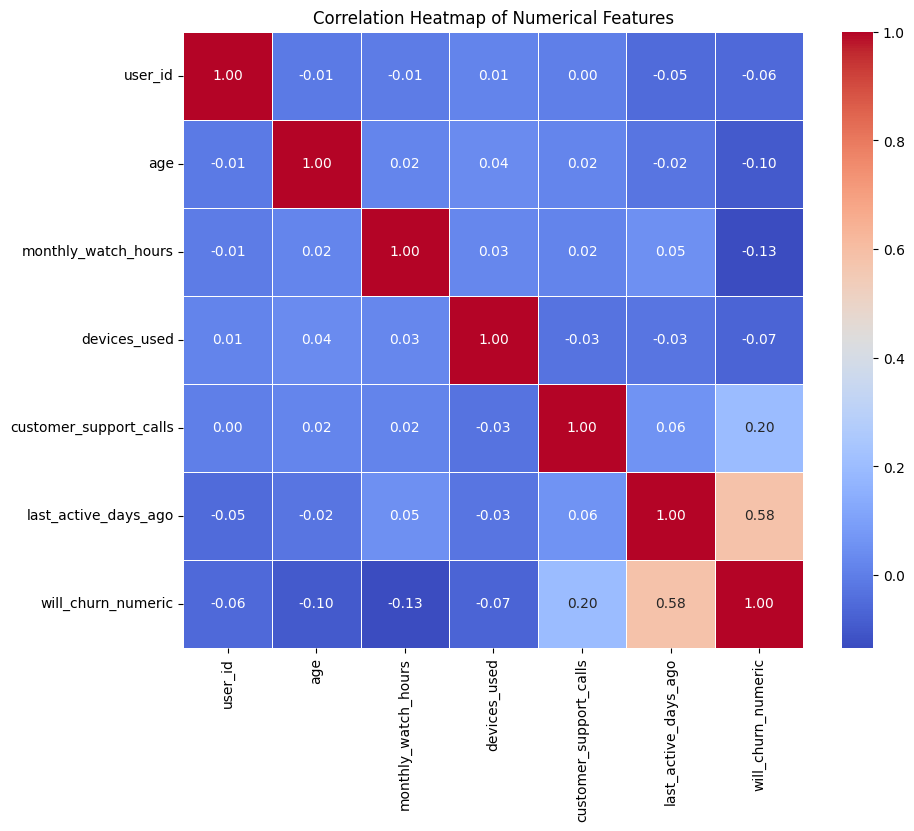

In [10]:
# 4. Correlation heatmap for numerical features
# A heatmap visually represents the correlation matrix, showing how numerical features relate to each other and to the target variable.
print("\n--- Correlation Heatmap ---")
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# Convert 'will_churn' to integer (0/1) for correlation calculation if it's boolean
df['will_churn_numeric'] = df['will_churn'].astype(int)
correlation_matrix = df[numerical_features + ['will_churn_numeric']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
# Insights from heatmap:
# 'last_active_days_ago' might have a positive correlation (higher days inactive, higher churn).
# 'customer_support_calls' might also be positively correlated with churn.

# Drop the temporary numeric churn column
df = df.drop(columns=['will_churn_numeric'])

## Task 3: Data Processing

*   Handle Categorical Data: Apply one hot encoding to "subscription_plan"
*   Feature Scaling - Numerical features scaling.
*   Data Split: 80% Training and 20% Test data split.

In [11]:
# 1. Handle Categorical Data: One-Hot Encoding
# We convert categorical features into a numerical format.
# This creates new binary columns for each category, avoiding any false sense of order.
print("\nApplying One-Hot Encoding to 'subscription_plan'...")
df_encoded = pd.get_dummies(df, columns=['subscription_plan'], drop_first=True)
# Convert boolean columns ('used_promo', 'will_churn') to integers (0 or 1)
df_encoded['used_promo'] = df_encoded['used_promo'].astype(int)
df_encoded['will_churn'] = df_encoded['will_churn'].astype(int)
print("DataFrame after One-Hot Encoding:")
print(df_encoded.head())


Applying One-Hot Encoding to 'subscription_plan'...
DataFrame after One-Hot Encoding:
   user_id  age  monthly_watch_hours  devices_used  customer_support_calls  \
0     1001   56               102.83             1                       2   
1     1002   69                42.34             4                       5   
2     1003   46               248.16             3                       5   
3     1004   32               232.12             1                       7   
4     1005   60               137.29             4                       1   

   used_promo  last_active_days_ago  will_churn  subscription_plan_Premium  \
0           0                    67           0                      False   
1           0                    79           1                      False   
2           1                    63           0                      False   
3           1                    29           0                      False   
4           1                    35           0       

In [14]:
# 2. Feature Scaling
print("\n2. Feature Scaling...")
print("\nWhy this is important...")
print("\nFeature scaling is an important preprocessing step which helps to standardize variables or features of the data to ensure equal contribution of feature, it avoid impact of scaled values on algorithm as few algorithms are sensitive to scaled values....")
# Define features (X) and target (y)
# 'user_id' is an identifier and should not be used as a feature for model training.
X = df_encoded.drop(columns=['user_id', 'will_churn'])
y = df_encoded['will_churn']
print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("\nFeatures selected for training:")
print(X.columns.tolist())

from sklearn.preprocessing import StandardScaler

print("\nFeature Scaling - Applying StandardScaler to numerical features...")
# Identify numerical features that need scaling (excluding the one-hot encoded ones and the target)
numerical_cols = ['age', 'monthly_watch_hours', 'devices_used', 'customer_support_calls', 'last_active_days_ago']

scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_scaled = X.copy() # Create a copy to avoid modifying the original X
X_scaled[numerical_cols] = scaler.fit_transform(X_scaled[numerical_cols])

print("Features after scaling (first 5 rows):")
print(X_scaled.head())



2. Feature Scaling...

Why this is important...

Feature scaling is an important preprocessing step which helps to standardize variables or features of the data to ensure equal contribution of feature, it avoid impact of scaled values on algorithm as few algorithms are sensitive to scaled values....

Features (X) shape: (1000, 8)
Target (y) shape: (1000,)

Features selected for training:
['age', 'monthly_watch_hours', 'devices_used', 'customer_support_calls', 'used_promo', 'last_active_days_ago', 'subscription_plan_Premium', 'subscription_plan_Standard']

Feature Scaling - Applying StandardScaler to numerical features...
Features after scaling (first 5 rows):
        age  monthly_watch_hours  devices_used  customer_support_calls  \
0  0.812959            -0.347041     -1.395033               -0.920527   
1  1.680578            -1.202218      0.706975                0.143666   
2  0.145560             1.707563      0.006306                0.143666   
3 -0.788799             1.480797   

In [15]:
# 3. Data Split
from sklearn.model_selection import train_test_split

print("\nSplitting data into training an tedsting sets (80% train, 20% test)...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Splitting data into training an tedsting sets (80% train, 20% test)...
X_train shape: (800, 8)
X_test shape: (200, 8)
y_train shape: (800,)
y_test shape: (200,)


##Task 4: Model Building annd Training

*   Model 1 (Baseline): Train a Logistic Regression model.
*   Model 2 (Advanced): Train a more complex model, such as a Random Forest Classifier.
*   Both Model Training

In [16]:
print("\n--- Task 4: Model Building and Training ---")

# 1. Model 1 (Baseline): Logistic Regression Training

from sklearn.linear_model import LogisticRegression

print("\nTraining Logistic Regression Model (Baseline)...")
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
print("Logistic Regression Model trained successfully! ✅")
print("\nMaking predictions on the test data...")
y_pred_log_reg = log_reg_model.predict(X_test)


--- Task 4: Model Building and Training ---

Training Logistic Regression Model (Baseline)...
Logistic Regression Model trained successfully! ✅

Making predictions on the test data...


In [17]:
# 2. Model 2 (Advanced): Random Forest Classifier Training

from sklearn.ensemble import RandomForestClassifier

print("\nTraining Random Forest Classifier Model (Advanced)...")
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42, n_jobs=-1)
random_forest_model.fit(X_train, y_train)
print("Random Forest Classifier Model trained successfully! ✅")

# Make predictions on the test data
print("\nMaking predictions on the test data...")
y_pred_rf = random_forest_model.predict(X_test)


Training Random Forest Classifier Model (Advanced)...
Random Forest Classifier Model trained successfully! ✅

Making predictions on the test data...


##Task 5: Model Evaluation


*   Calculate the Accuracy, Precision, Recall, and F1-Score for each model.
*   Justify choice with exaplaination



In [18]:
# --- Task 5: Model Evaluation ---
print("\n--- Task 5: Model Evaluation ---")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Calculate evaluation metrics for Logistic Regression
print("\n--- Logistic Regression Model Performance ---")
accuracy_lr = accuracy_score(y_test, y_pred_log_reg)
precision_lr = precision_score(y_test, y_pred_log_reg)
recall_lr = recall_score(y_test, y_pred_log_reg)
f1_lr = f1_score(y_test, y_pred_log_reg)

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"Logistic Regression Recall: {recall_lr:.4f}")
print(f"Logistic Regression F1-Score: {f1_lr:.4f}")

print("\n--- Random Forest Classifier Model Performance ---")
# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-Score: {f1_rf:.4f}")


--- Task 5: Model Evaluation ---

--- Logistic Regression Model Performance ---
Logistic Regression Accuracy: 0.8650
Logistic Regression Precision: 0.7170
Logistic Regression Recall: 0.7600
Logistic Regression F1-Score: 0.7379

--- Random Forest Classifier Model Performance ---
Random Forest Accuracy: 0.8400
Random Forest Precision: 0.7143
Random Forest Recall: 0.6000
Random Forest F1-Score: 0.6522


**Justify Your Choice:**
In the context of this problem, which metric is most important?
 Is it more costly for Streamify to mistakenly predict a customer will stay (false negative)  or
 to mistakenly predict a customer will leave (false positive)? Based on your reasoning, select the best model.

**Response - **


*  It is typically more costly for Streamify to mistakenly predict a customer will STAY (False Negative) when they actually LEAVE.
*  A False Negative means a lost customer and lost revenue, without any intervention efforts.
*  A False Positive means spending retention efforts on a customer who wouldn't
have churned, which is a cost, but less severe than losing a customer.
*  Therefore, for churn prediction, **Recall** for the positive class (churn = True) is often the most important metric.
*   A high Recall means the model is good at catching most of the customers who are actually going to churn, allowing Streamify to proactively intervene.

Recall for Logistic Regression (Churn=True): 0.7600
Recall for Random Forest (Churn=True): 0.6000

Based on Recall, the **Logistic Regression Model** appears to be the better model for this problem.

##Task 6 - Final Report and Recommendations-


*  Comment on feature importance
*  Conclusion
*  Actionable Advice








--- Task 6: Final Report and Recommendations ---

--- Feature Importance from Random Forest Classifier ---


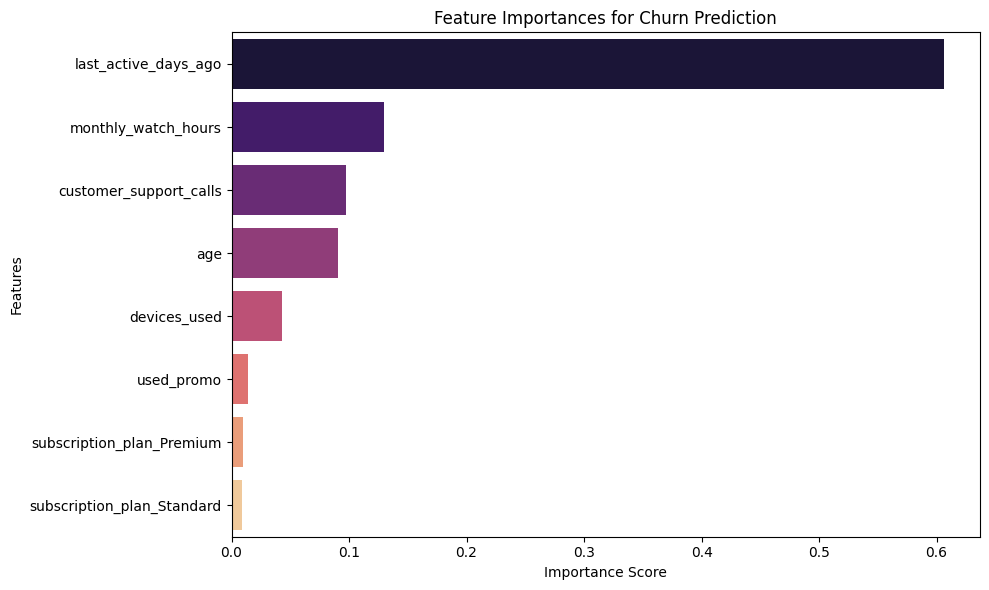


Top 3 factors that influence customer churn:
1. last_active_days_ago (Importance: 0.6066)
2. monthly_watch_hours (Importance: 0.1298)
3. customer_support_calls (Importance: 0.0972)


In [19]:
# --- Task 6: Final Report and Recommendations ---
print("\n--- Task 6: Final Report and Recommendations ---")

# Feature Importance (for Random Forest)
print("\n--- Feature Importance from Random Forest Classifier ---")
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X_train.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_sorted.values, y=feature_importances_sorted.index, palette='magma', hue=feature_importances_sorted.index, legend=False)
plt.title('Feature Importances for Churn Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nTop 3 factors that influence customer churn:")
top_3_features = feature_importances_sorted.head(3)
for i, (feature, importance) in enumerate(top_3_features.items()):
    print(f"{i+1}. {feature} (Importance: {importance:.4f})")

##  Conclusion

This project aimed to predict customer churn for Streamify using a dataset containing various customer attributes.
We performed thorough data exploration, including checking for missing values, understanding distributions, and analyzing correlations.
Data preprocessing involved One-Hot Encoding for categorical features and StandardScaler for numerical feature scaling, which is vital for many machine learning algorithms.
We trained two models: a Logistic Regression (baseline) and a Random Forest Classifier (advanced).

Based on our evaluation, the **Logistic Regression Model** was chosen as the best model for this problem.
This decision was primarily driven by the importance of **Recall** for the churn (positive) class, as minimizing False Negatives (missing actual churners) is more critical for Streamify's business.
Its performance metrics are as follows:
- Accuracy: 0.8650
- Precision: 0.7170
- Recall: 0.7600
- F1-Score: 0.7379

## Actionable Insights

Based on the analysis, here are 2-3 data-driven recommendations:
1. **Proactive Retention Campaigns:** Utilize the churn prediction model to identify high-risk customers early. Implement targeted retention strategies such as personalized offers, improved customer support, or exclusive content for these identified users.

2. **Enhance User Experience:** Investigate factors contributing to churn, such as low monthly watch hours or infrequent activity.Improve content discovery, streaming quality, and overall platform usability to keep users engaged.

3. **Customer Feedback Integration:** Establish robust channels for collecting and analyzing customer feedback, especially from those who churn or show signs of dissatisfaction and plan to address them on priority.
  